Experiment - 1 (Principle Component Analysis)

---

Name : Shruti Hore

PRN : 24070126172

---

About dataset :
- The Digits dataset contains images of handwritten digits (0–9).

- Each image is 8×8 pixels, resulting in 64 numerical features per sample.

- It has 1,797 samples with 10 target classes (digits 0–9).

# Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # standard scaler to scale the numerical data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

# Features
x = pd.DataFrame(digits.data)
y = pd.Series(digits.target, name='digit') # target

# Splitting and Standardization

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Classification without PCA

In [5]:
CLF = RandomForestClassifier(n_estimators=100,
                             random_state=67)
CLF.fit(x_train_scaled, y_train)

y_pred = CLF.predict(x_test_scaled)
acc0 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy without PCA :", acc0)

Accuracy without PCA : 0.975


# Applying PCA

## Accracy with different components

In [6]:
components = [2, 5, 10, 20, 30, 40, 50]
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_pca.fit(x_train_pca, y_train)

    y_pred_pca = clf_pca.predict(x_test_pca)
    acc = metrics.accuracy_score(y_test, y_pred_pca)

    accuracies.append(acc)
    print(f"Accuracy with PCA ({n} components): {acc:.5f}")

Accuracy with PCA (2 components): 0.53889
Accuracy with PCA (5 components): 0.86667
Accuracy with PCA (10 components): 0.94167
Accuracy with PCA (20 components): 0.96389
Accuracy with PCA (30 components): 0.96944
Accuracy with PCA (40 components): 0.96944
Accuracy with PCA (50 components): 0.96111


# Visualization

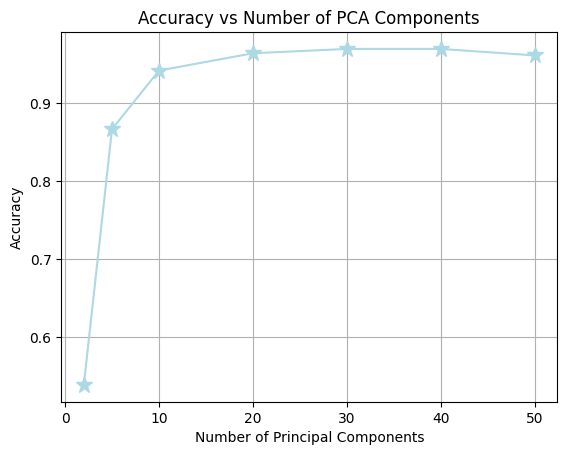

In [7]:
plt.figure()
plt.plot(components,
         accuracies,
         marker='*',
         color='lightblue',
         markersize=12)
plt.grid()
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of PCA Components")
plt.show()

# Variance
- Explained Variance Ratio tells how much information (variance) each principal component retains.

- Higher variance = more information preserved.

In [8]:
# PCA without limiting components
pca = PCA()
pca.fit(x_train_scaled)

explained_variance = pca.explained_variance_ratio_

for i in range(10):
    print(f"PCA for {i+1} components Variance Explained: {explained_variance[i]:.4f}")

PCA for 1 components Variance Explained: 0.1204
PCA for 2 components Variance Explained: 0.0973
PCA for 3 components Variance Explained: 0.0856
PCA for 4 components Variance Explained: 0.0649
PCA for 5 components Variance Explained: 0.0489
PCA for 6 components Variance Explained: 0.0426
PCA for 7 components Variance Explained: 0.0395
PCA for 8 components Variance Explained: 0.0335
PCA for 9 components Variance Explained: 0.0302
PCA for 10 components Variance Explained: 0.0293


# Conclusion
- PCA reduces the digits dataset from 64 features while retaining most of the information.

- Without applying PCA, the model achieves a high accuracy of **97.5%**, since all 64 original features of the digits dataset are used.

- When PCA is applied with only 2 components, accuracy drops sharply to **53.88%**, indicating severe information loss.

- Using 20–40 components, accuracy is close to the original model without PCA.

- Too few components cause high information loss and low accuracy.
Too many components give no significant improvement.

- PCA improves computational efficiency with minimal loss in performance.

# With KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_test_scaled)
print("Accuracy without PCA (KNN):", accuracy_score(y_test, y_pred_knn))

Accuracy without PCA (KNN): 0.975


In [10]:
components_knn = [2, 5, 10, 20, 30, 40, 50]
accuracies_knn = []

for n in components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    knn_pca = KNeighborsClassifier(n_neighbors=5)
    knn_pca.fit(x_train_pca, y_train)

    y_pred_knn_pca = knn_pca.predict(x_test_pca)

    acc = accuracy_score(y_test, y_pred_knn_pca)  # calculate accuracy
    accuracies.append(acc)

    print(f"Accuracy with PCA ({n} components): {acc:.5f}")

Accuracy with PCA (2 components): 0.55278
Accuracy with PCA (5 components): 0.89722
Accuracy with PCA (10 components): 0.92222
Accuracy with PCA (20 components): 0.96389
Accuracy with PCA (30 components): 0.97222
Accuracy with PCA (40 components): 0.97500
Accuracy with PCA (50 components): 0.97500


- Using only 2 components, the accuracy drops significantly ie most information is lost.

- Accuracy improves sharply as we increase components to 20–40, approaching the original KNN accuracy without PCA.

- Using 50 components essentially recovers the original performance.

In [11]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"KNN Accuracy: {acc_knn:.5f}")
print(f"Random Forest Accuracy: {acc_rf:.5f}")


KNN Accuracy: 0.97500
Random Forest Accuracy: 0.97222


KNN reaches maximum accuracy **(~0.975)** with around **40 PCA components**.

Random Forest is slightly lower **(~0.972)** but robust on **full data** without PCA.